In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn import datasets
from sklearn.model_selection import train_test_split


In [2]:
data_breast_cancer = datasets.load_breast_cancer(as_frame=True) 
print(data_breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
data_iris = datasets.load_iris(as_frame=True)
print(data_iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


X_bc = data_breast_cancer['data'][['mean area', 'mean smoothness']]
y_bc = data_breast_cancer['target']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

model_without_auto_scaling = LinearSVC(loss='hinge' ,random_state=42)
model_without_auto_scaling.fit(X_train_bc, y_train_bc)
y_train_bc_pred = model_without_auto_scaling.predict(X_train_bc)
y_test_bc_pred = model_without_auto_scaling.predict(X_test_bc)

model_with_auto_scaling = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(loss='hinge', random_state=42))
])
model_with_auto_scaling.fit(X_train_bc, y_train_bc)
y_train_bc_pred_scaled = model_with_auto_scaling.predict(X_train_bc)
y_test_bc_pred_scaled = model_with_auto_scaling.predict(X_test_bc)

accuracy = [
    accuracy_score(y_train_bc, y_train_bc_pred),
    accuracy_score(y_test_bc, y_test_bc_pred),
    accuracy_score(y_train_bc, y_train_bc_pred_scaled),
    accuracy_score(y_test_bc, y_test_bc_pred_scaled)
]
print(accuracy)
with open('bc_acc.pkl', 'wb') as f:
    pickle.dump(accuracy, f)

[0.6285714285714286, 0.6228070175438597, 0.8923076923076924, 0.9298245614035088]


/Users/damianotto/miniconda3/envs/mllab/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/damianotto/miniconda3/envs/mllab/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/damianotto/miniconda3/envs/mllab/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [5]:
X_ir = data_iris['data'][['petal length (cm)', 'petal width (cm)']]
y_ir = (data_iris['target'] == 2).astype(np.float64)
X_train_ir, X_test_ir, y_train_ir, y_test_ir = train_test_split(X_ir, y_ir, test_size=0.2, random_state=42)

model_iris_without_auto_scaling = LinearSVC(loss='hinge', random_state=42)
model_iris_without_auto_scaling.fit(X_train_ir, y_train_ir)
y_train_ir_pred = model_iris_without_auto_scaling.predict(X_train_ir)
y_test_ir_pred = model_iris_without_auto_scaling.predict(X_test_ir)

model_iris_with_auto_scaling = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(loss='hinge', random_state=42))])
model_iris_with_auto_scaling.fit(X_train_ir, y_train_ir)
y_train_ir_pred_scaled = model_iris_with_auto_scaling.predict(X_train_ir)
y_test_ir_pred_scaled = model_iris_with_auto_scaling.predict(X_test_ir)

accuracy_iris = [
    accuracy_score(y_train_ir, y_train_ir_pred),
    accuracy_score(y_test_ir, y_test_ir_pred),
    accuracy_score(y_train_ir, y_train_ir_pred_scaled),
    accuracy_score(y_test_ir, y_test_ir_pred_scaled)
]
print(accuracy_iris)
with open('iris_acc.pkl', 'wb') as f:
    pickle.dump(accuracy_iris, f)



[0.9416666666666667, 1.0, 0.9416666666666667, 1.0]


/Users/damianotto/miniconda3/envs/mllab/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/damianotto/miniconda3/envs/mllab/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/damianotto/miniconda3/envs/mllab/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


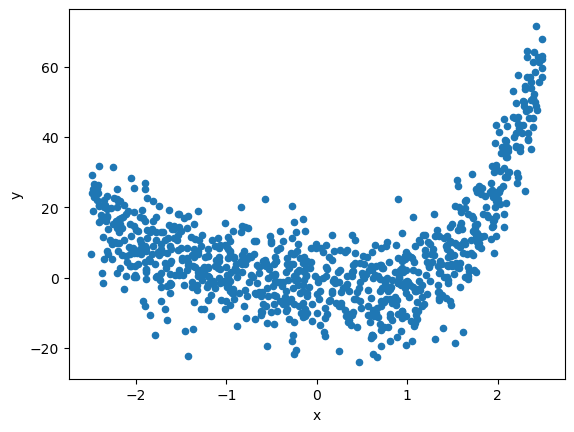

In [6]:
size = 900
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4 
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 1. Zbuduj potok rozszerzający cechy do 4 wymiarów, za pomocą wielomianu 4 stopnia oraz regresora LinearSVR z domyslnymi parametrami.
# 2. Oblicz MSE dla zbioru uczącego i zbioru testowego. Wyniki powinny być podobne do najlep- szych rezultatów z ćwiczenia o regresji, lub nawet lepsze.
# 3. Powtórz uczenie dla regresora SVR z kernelem poly 4 stopnia i pozostałymi parametrami z wartościami domyslnymi. Wyniki MSE powinny być ... rozczarowujące.
# 4. Jakie hiperparametry użyć żeby SVR miał podobną jakość co LinearSVR? Użyj Grid- SearchCV na całym zbiorze danych (nie tylko uczącym!). Do znalezienia optymalnej pary parametrów coef0 oraz C. Jak funkcje oceny zastosuj neg_mean_squared_error. Poszukaj optymalnych wartości spośród: "C" : [0.1, 1, 10], "coef0" : [0.1, 1, 10].
# 5. Dla wyliczonych optymalnych wartości hiperparametrów przeprowadź proces uczenia SVR raz jeszcze. Oblicz wyniki MSE dla zbioru uczącego i testowego.
# 6. Zapisz wyniki MSE z punktu 2 i 5 na liście (4 elementy), którą następnie zapisz w pliku Pickle o nazwie: reg_mse.pkl.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVR , SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

poly_features = PolynomialFeatures(degree=4)
X_train_reg_poly = poly_features.fit_transform(X_train_reg.reshape(-1, 1))
X_test_reg_poly = poly_features.transform(X_test_reg.reshape(-1, 1))

svm_reg_poly = LinearSVR()
svm_reg_poly.fit(X_train_reg_poly, y_train_reg)
y_train_reg_poly_pred = svm_reg_poly.predict(X_train_reg_poly)
y_test_reg_poly_pred = svm_reg_poly.predict(X_test_reg_poly)

mse_train_reg_poly = mean_squared_error(y_train_reg, y_train_reg_poly_pred)
mse_test_reg_poly = mean_squared_error(y_test_reg, y_test_reg_poly_pred)


/Users/damianotto/miniconda3/envs/mllab/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/damianotto/miniconda3/envs/mllab/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [8]:
svm_poly_reg = SVR(kernel='poly', degree=4)
svm_poly_reg.fit(X_train_reg.reshape(-1, 1), y_train_reg)
y_train_reg_pred = svm_poly_reg.predict(X_train_reg.reshape(-1, 1))
y_test_reg_pred = svm_poly_reg.predict(X_test_reg.reshape(-1, 1))

mse_train_reg = mean_squared_error(y_train_reg, y_train_reg_pred)
mse_test_reg = mean_squared_error(y_test_reg, y_test_reg_pred)


In [9]:
param_grid = {
    'C': [0.1, 1, 10],
    'coef0': [0.1, 1, 10]
}

search = GridSearchCV(svm_poly_reg, param_grid, scoring='neg_mean_squared_error', n_jobs=-1)
search.fit(X.reshape(-1, 1), y)

svm_poly_reg_best = SVR(kernel='poly', degree=4, C=10, coef0=10)
svm_poly_reg_best.fit(X_train_reg.reshape(-1, 1), y_train_reg)
y_train_reg_pred_best = svm_poly_reg_best.predict(X_train_reg.reshape(-1, 1))
y_test_reg_pred_best = svm_poly_reg_best.predict(X_test_reg.reshape(-1, 1))
mse_train_reg_best = mean_squared_error(y_train_reg, y_train_reg_pred_best)
mse_test_reg_best = mean_squared_error(y_test_reg, y_test_reg_pred_best)

In [11]:
mse_result_list = [mse_train_reg_poly, mse_test_reg_poly, mse_train_reg_best, mse_test_reg_best]
print(mse_result_list)
with open('reg_mse.pkl', 'wb') as f:
    pickle.dump(mse_result_list, f)
    

[63.72058146708354, 65.3167224320178, 63.52968810813824, 65.6090648073951]
